# Titanic

In [1]:
# Make sure pandas and sklearn are installed!
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

/anaconda3/envs/data_science_club/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


We will look at the titanic problem. In this problem we are given data on passengers on the titanic. 

Our goal: build a predictive model that can accurately predict who will survive the titanic tragedy.

First, let’s create DataFrames of our data. Our data is split into two parts, first is the training data, which we will use to build our model. The second is our test data, this is used to test our final results. 


In [2]:
# Convert csv files into DataFrame - Makes it easy to manipulate data
train = pd.read_csv("data/titanic_train.csv")
test = pd.read_csv("data/titanic_test.csv")

## Our Data

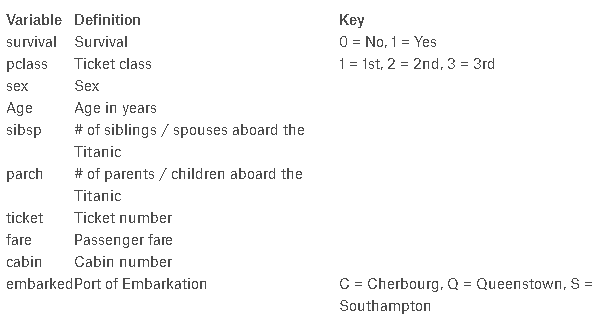

In [3]:
# Meaning of Variables
from IPython.display import Image
Image("data/data_dictionary.png")

In [4]:
# Sneak Peak at our Data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

We will drop complicated features and convert string objects to numeric via one hot encoding

In [5]:
print(f"Shape of train data frame before preprocessing: {train.shape}")

# Drop features we won't use
train.drop(["Name","Ticket","Cabin"],axis=1,inplace=True) # Drop Name and Tickets
test.drop(["Name","Ticket","Cabin"],axis=1,inplace=True) # Drop Name and Tickets

# Impute missing values as the mean value of column in training data
train.fillna(train.mean(),inplace=True) 
test.fillna(train.mean(),inplace=True) 

train = pd.get_dummies(train,dummy_na=True) # One Hot Encode Features
test = pd.get_dummies(test,dummy_na=True) # One Hot Encode Features

print(f"Shape of train data frame after preprocessing: {train.shape}")

Shape of train data frame before preprocessing: (891, 12)
Shape of train data frame after preprocessing: (891, 14)


Next we will split our training data into train and validation

In [7]:
# Create target 
target = train["Survived"]

# Drop Target from train set
del train["Survived"]

# Make Splits
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(["PassengerId"],axis=1),target)

# Model Fitting

Now that we have split up our data, let's build a random forest and adaboost classifiers for this data.

We will fit the models using train, and validate using validation data. 

## Random Forest

In [8]:
# Fit Random Forest 
rf = RandomForestClassifier(n_estimators = 500) # Create Random Forest Object
rf.fit(X_train,y_train) # Fit Random Forest object
y_hat_rf = rf.predict(X_valid) # Predict on Valdiation Set
print(f"The accuracy of random forest is {rf.score(X_valid,y_valid)}!")

The accuracy of random forest is 0.7847533632286996!


## Adaboost

In [9]:
# Fit AdaBoost
adb = AdaBoostClassifier(n_estimators=30) # Create Adaboost Object
adb.fit(X_train,y_train) # Fit Adaboost object
y_hat_adb = rf.predict(X_valid) # Predict on Valdiation Set
print(f"The accuracy of adaboost is {adb.score(X_valid,y_valid)}!")

The accuracy of adaboost is 0.7982062780269058!


Wow, these models have done a pretty good job at predicting whether or not somebody survived! 

# Feature Importance

Feature Importance let's us look under the hood at our model.

We compare the what features each model though were important 

In [10]:
def plot_importance(obj,columns=X_train.columns):
    model_type = str(obj.__class__)[:-2].split(".")[-1] # Get Model Type Name
    pd.Series(obj.feature_importances_,index=columns).sort_values(ascending=True).plot(kind="barh",title=model_type+" Importance")


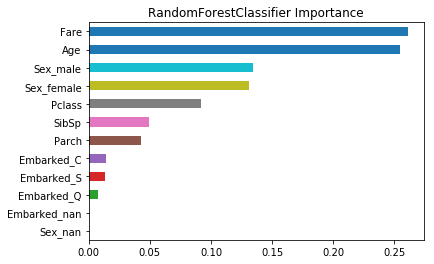

In [11]:
%matplotlib inline
plot_importance(rf)

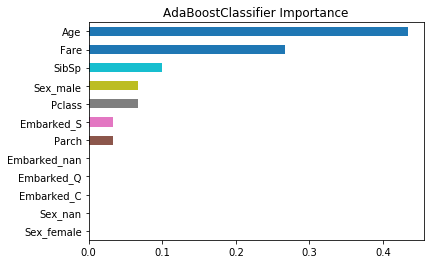

In [12]:
plot_importance(adb)

# Kaggle Submission

If we choose to submit the Random Forest model:
https://www.kaggle.com/c/titanic

In [13]:
pred = rf.predict(test.drop(["PassengerId"],axis=1)) 
sub = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":pred})

In [14]:
sub.to_csv("submissions/rf_sub.csv",index=False) # LB .0.74641

My submission performed 0.74641 on the leader board.


The slides can be found here: https://docs.google.com/presentation/d/1aiTfYh-E5IUWvjlOfJXLqeBUDIf4FI7BhKv9dk55Vjs/edit?usp=sharing